# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Timothy Mulya Cahyana
- Email: timothymulyacahyana@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score

### Menyiapkan data yang akan diguankan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Dicoding/BelajarPenerapanDataScience/ProyekAkhir/data.csv'

In [4]:
df = pd.read_csv(data_path, delimiter=';')
df.head().T

,0,1,2,3,4
Marital_status,1,1,1,1,2
Application_mode,17,15,1,17,39
Application_order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime_evening_attendance,1,1,1,1,0
Previous_qualification,1,1,1,1,1
Previous_qualification_grade,122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mothers_qualification,19,1,37,38,37
Fathers_qualification,12,3,37,37,38


## Data Understanding

Mengecek nama-nama kolom, memperbaiki nama-nama kolom, melihat tipe data, analisis deskriptif data.

In [5]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [6]:
new_feature_names = {
    'Marital_status': 'Marital_Status',
    'Application_mode': 'Application_Mode',
    'Application_order': 'Application_Order',
    'Daytime_evening_attendance': 'Daytime_Evening_Attendance',
    'Previous_qualification': 'Previous_Qualification',
    'Previous_qualification_grade': 'Previous_Qualification_Grade',
    'Nacionality': 'Nationality', # Correcting the typo
    'Mothers_qualification': 'Mothers_Qualification',
    'Fathers_qualification': 'Fathers_Qualification',
    'Mothers_occupation': 'Mothers_Occupation',
    'Fathers_occupation': 'Fathers_Occupation',
    'Admission_grade': 'Admission_Grade',
    'Educational_special_needs': 'Educational_Special_Needs',
    'Tuition_fees_up_to_date': 'Tuition_Fees_Up_To_Date',
    'Scholarship_holder': 'Scholarship_Holder',
    'Age_at_enrollment': 'Age_At_Enrollment',
    'Unemployment_rate': 'Unemployment_Rate',
    'Inflation_rate': 'Inflation_Rate',
    # Shortening and standardizing curricular unit names
    'Curricular_units_1st_sem_credited': '1st_Sem_Units_Credited',
    'Curricular_units_1st_sem_enrolled': '1st_Sem_Units_Enrolled',
    'Curricular_units_1st_sem_evaluations': '1st_Sem_Units_Evaluations',
    'Curricular_units_1st_sem_approved': '1st_Sem_Units_Approved',
    'Curricular_units_1st_sem_grade': '1st_Sem_Units_Grade',
    'Curricular_units_1st_sem_without_evaluations': '1st_Sem_Units_Without_Evaluations',
    'Curricular_units_2nd_sem_credited': '2nd_Sem_Units_Credited',
    'Curricular_units_2nd_sem_enrolled': '2nd_Sem_Units_Enrolled',
    'Curricular_units_2nd_sem_evaluations': '2nd_Sem_Units_Evaluations',
    'Curricular_units_2nd_sem_approved': '2nd_Sem_Units_Approved',
    'Curricular_units_2nd_sem_grade': '2nd_Sem_Units_Grade',
    'Curricular_units_2nd_sem_without_evaluations': '2nd_Sem_Units_Without_Evaluations',
}

df = df.rename(columns=new_feature_names)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marital_Status                     4424 non-null   int64  
 1   Application_Mode                   4424 non-null   int64  
 2   Application_Order                  4424 non-null   int64  
 3   Course                             4424 non-null   int64  
 4   Daytime_Evening_Attendance         4424 non-null   int64  
 5   Previous_Qualification             4424 non-null   int64  
 6   Previous_Qualification_Grade       4424 non-null   float64
 7   Nationality                        4424 non-null   int64  
 8   Mothers_Qualification              4424 non-null   int64  
 9   Fathers_Qualification              4424 non-null   int64  
 10  Mothers_Occupation                 4424 non-null   int64  
 11  Fathers_Occupation                 4424 non-null   int64

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_Status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_Mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_Order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_Evening_Attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_Qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_Qualification_Grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nationality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_Qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_Qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


Cek label-label yang ada pada fitur Status.

In [9]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Status' in numerical_cols:
    numerical_cols.remove('Status')


Visualisasi distribusi data menggunakan Histogram.

Visualizing distributions for 36 numerical features.


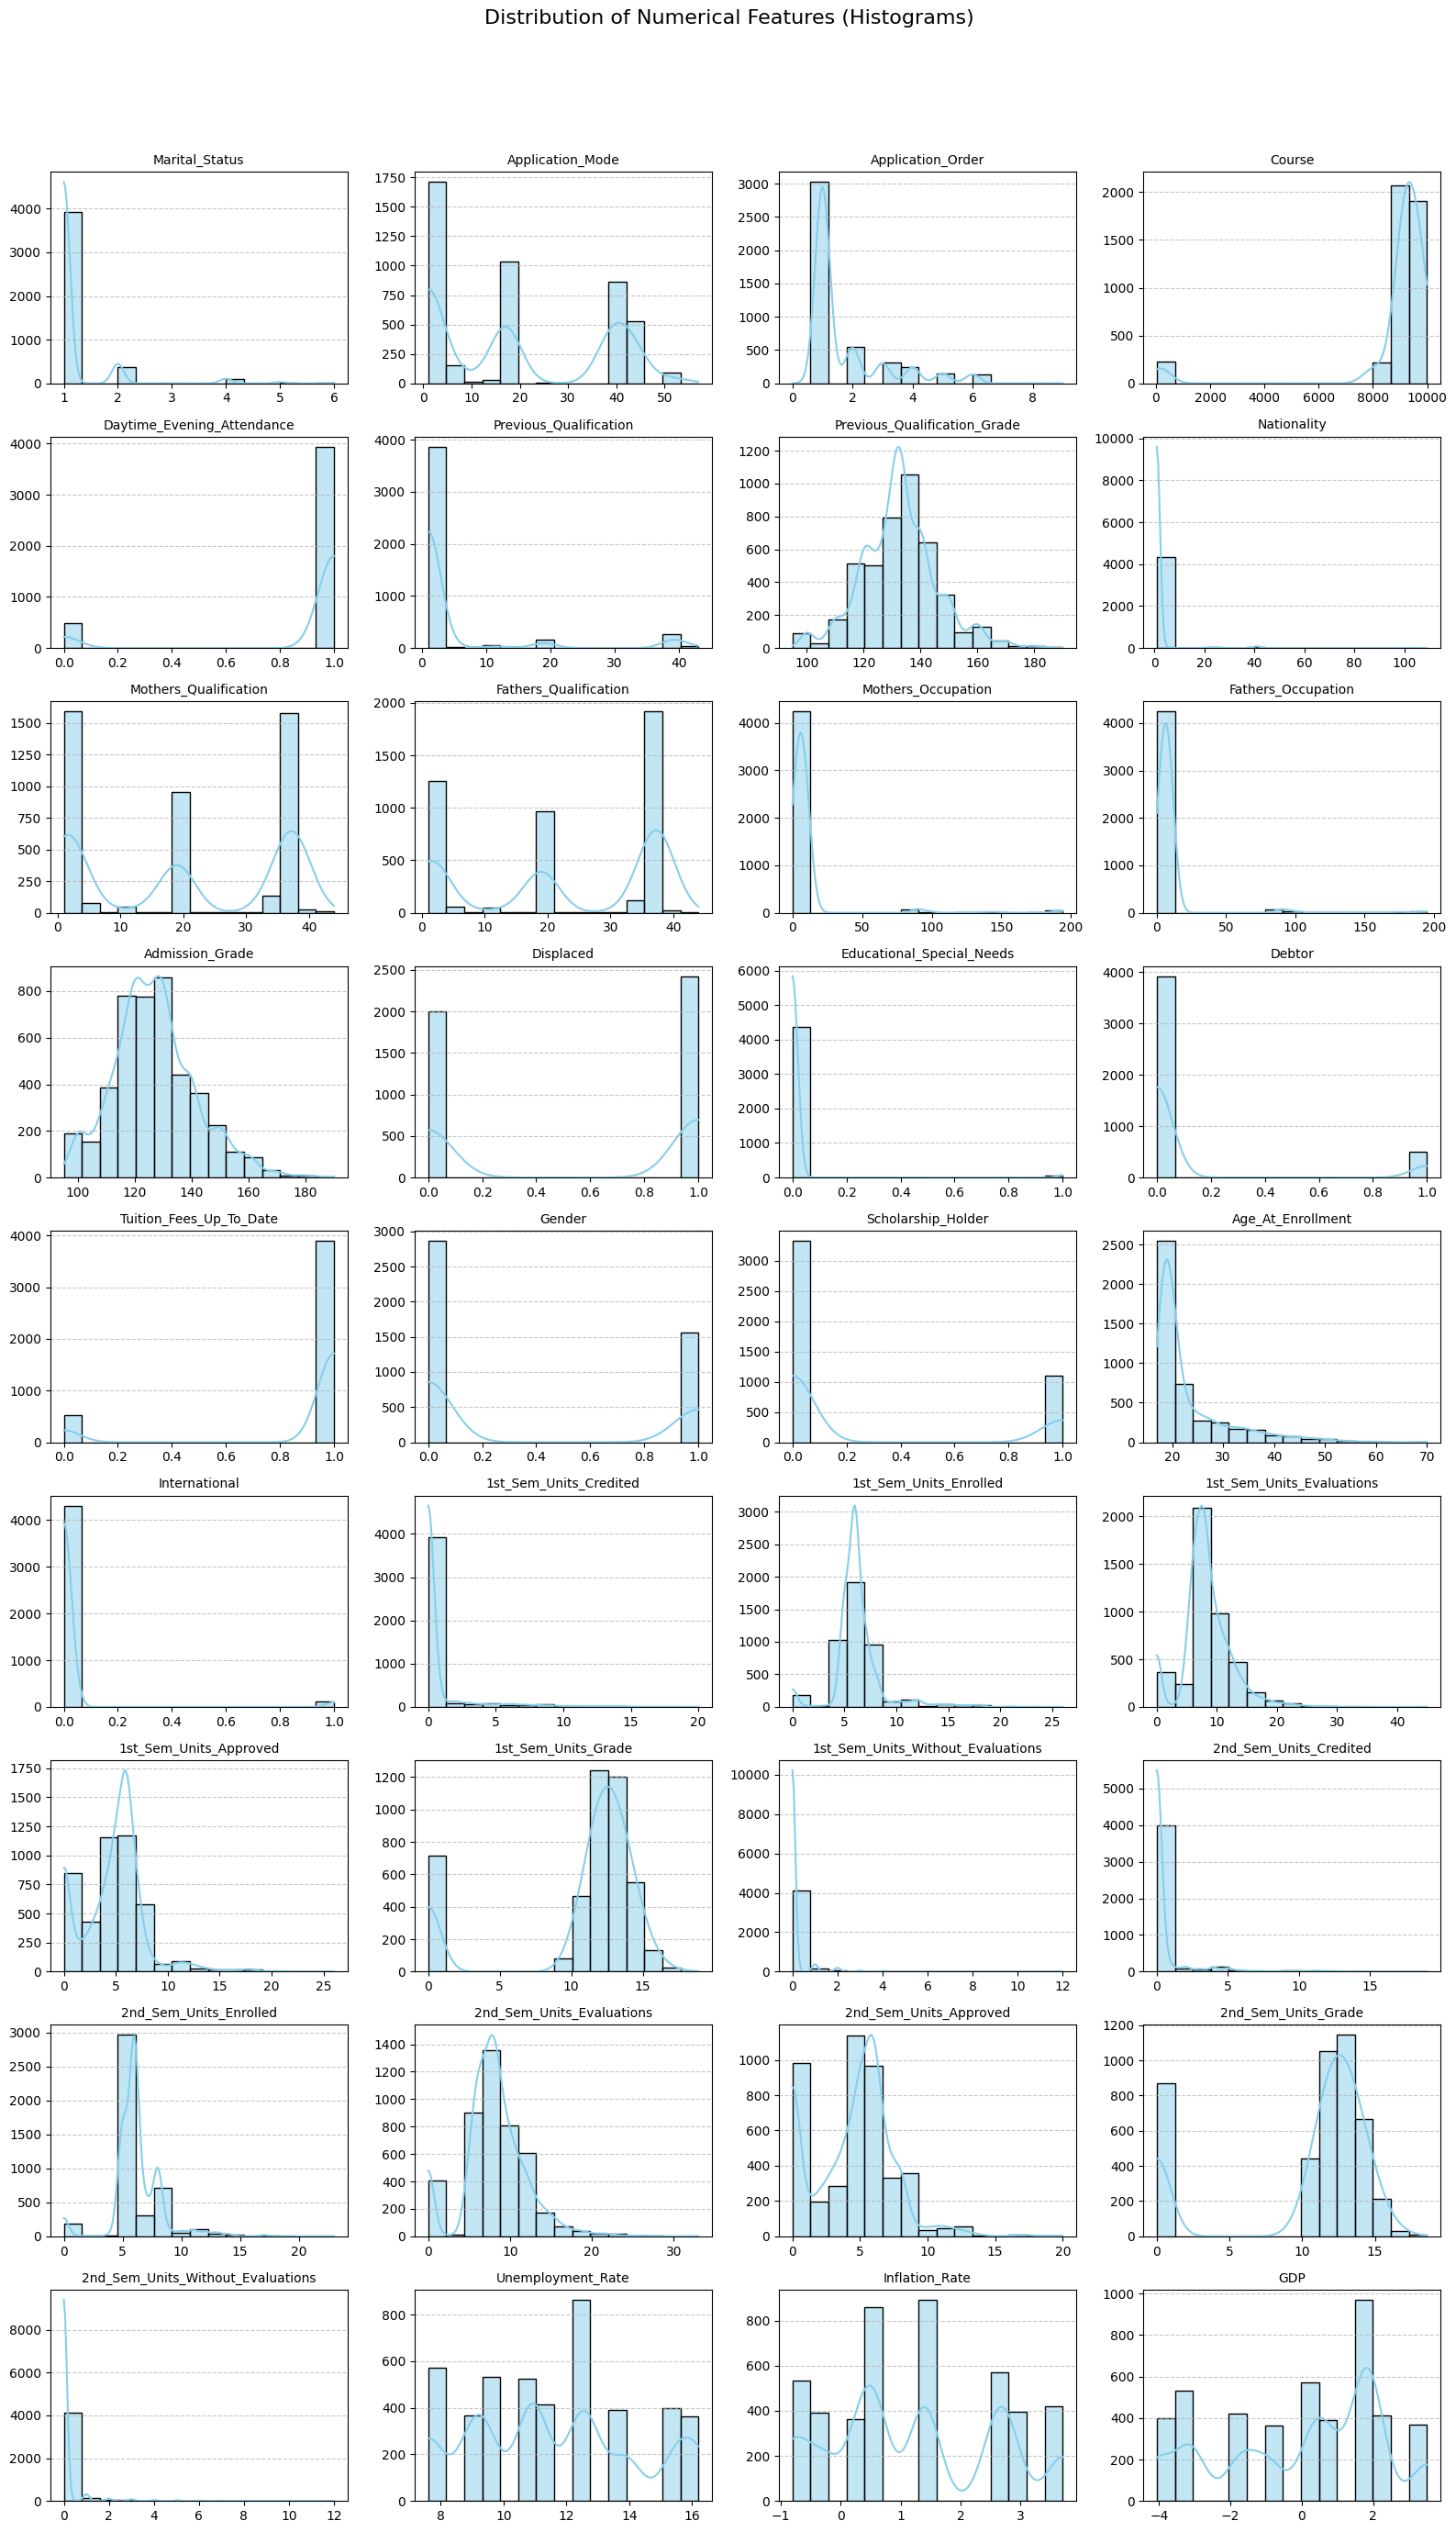

In [11]:
print(f"Visualizing distributions for {len(numerical_cols)} numerical features.")

# Plotting Histograms for all numerical features
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Distribution of Numerical Features (Histograms)', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Visualisasi distribusi umur.

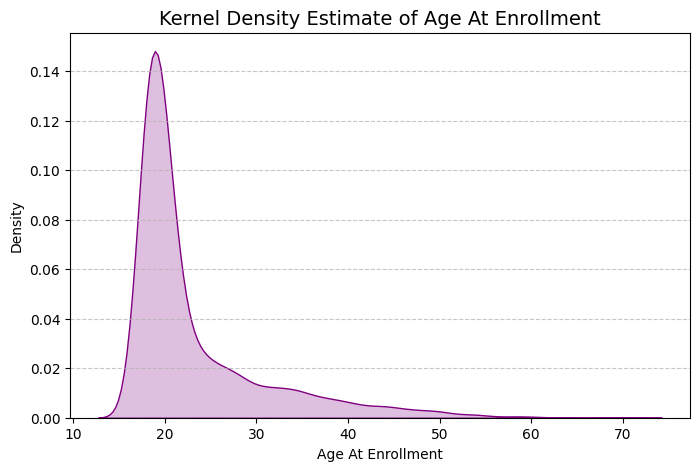

In [12]:
if 'Age_At_Enrollment' in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df['Age_At_Enrollment'], fill=True, color='purple')
    plt.title('Kernel Density Estimate of Age At Enrollment', fontsize=14)
    plt.xlabel('Age At Enrollment')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\n'Age_At_Enrollment' not found in numerical columns for specific KDE plot example.")

Mapping label ke nilai numerikal.

In [13]:
status_mapping = {
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
}

inverse_status_mapping = {v: k for k, v in status_mapping.items()}

df_encoded = df.copy()
df_encoded['Status'] = df_encoded['Status'].map(status_mapping)

print("\n'Status' unique values after mapping:", df_encoded['Status'].unique())
print("DataFrame head with encoded Status:")


'Status' unique values after mapping: [0 2 1]
DataFrame head with encoded Status:


Matriks korelasi untuk mencari hubungan antara fitur target dan fitur lainnya. Juga untuk membantu feature selection & extraction.

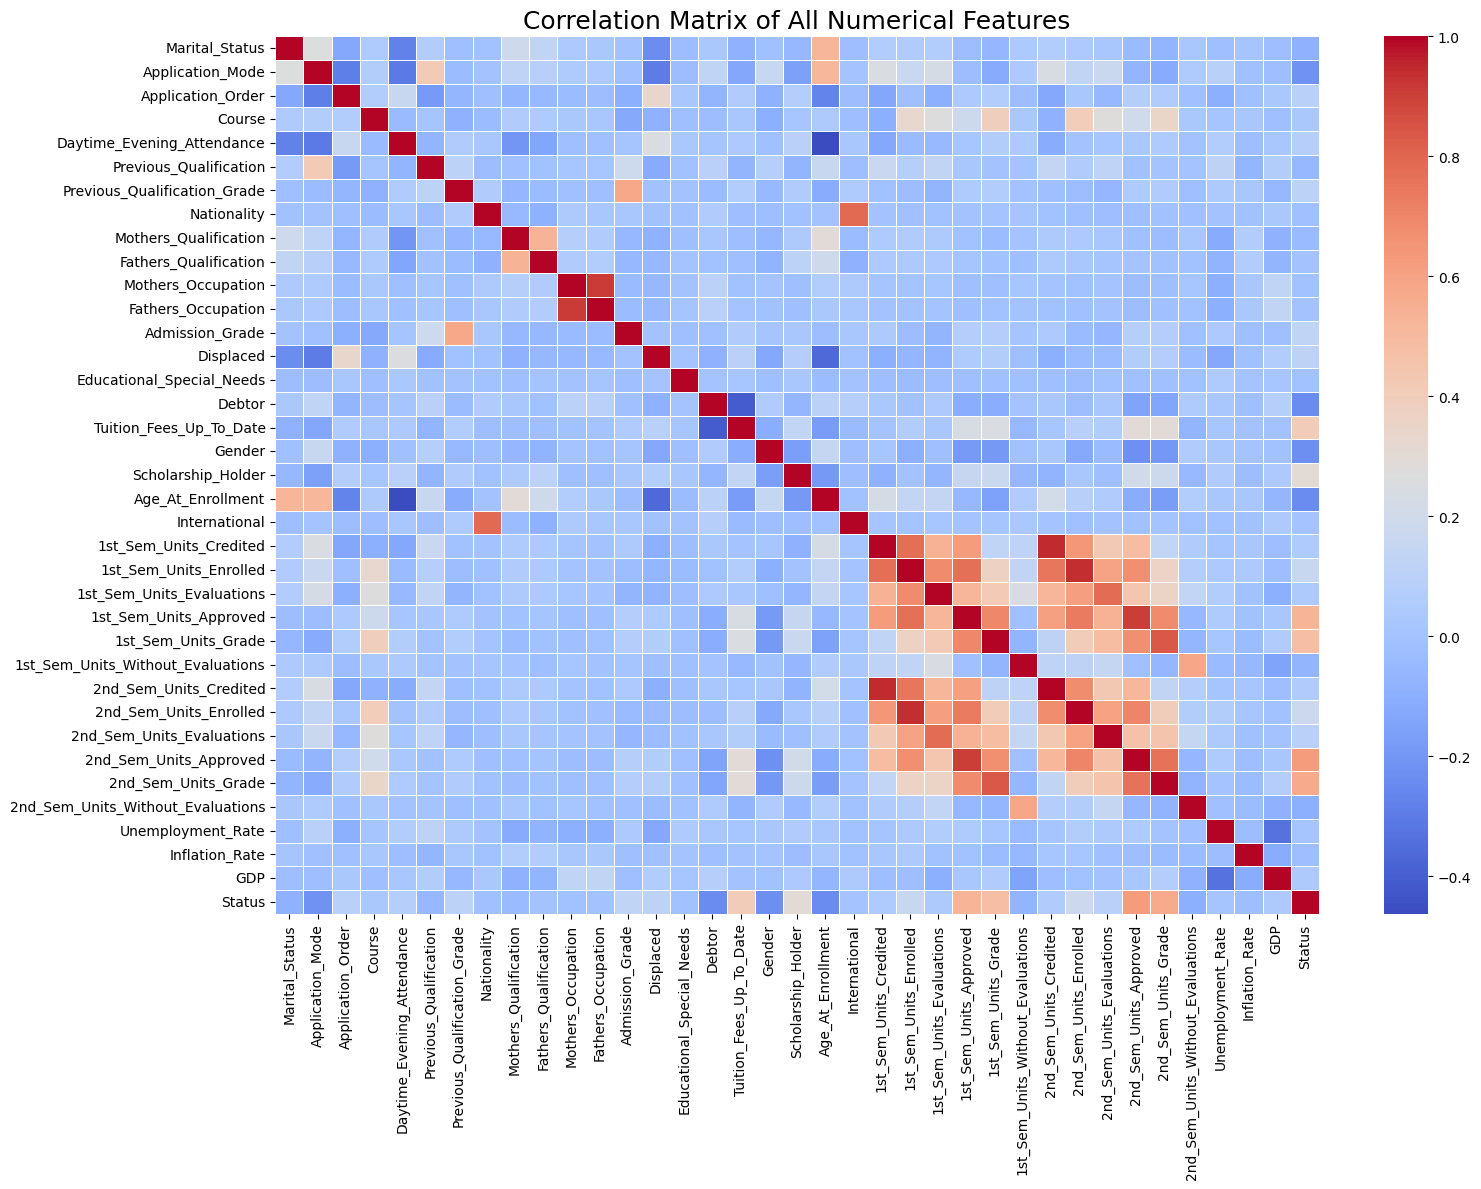

In [14]:
correlation_matrix = df_encoded.select_dtypes(include=np.number).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Features', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Print list fitur mulai dari yang tertinggi sampai yang terendah, serta divisualisasikan.


Correlation between 'Status' (Encoded) and other features
Status                               1.000000
2nd_Sem_Units_Approved               0.624157
2nd_Sem_Units_Grade                  0.566827
1st_Sem_Units_Approved               0.529123
1st_Sem_Units_Grade                  0.485207
Tuition_Fees_Up_To_Date              0.409827
Scholarship_Holder                   0.297595
2nd_Sem_Units_Enrolled               0.175847
1st_Sem_Units_Enrolled               0.155974
Admission_Grade                      0.120889
Displaced                            0.113986
Previous_Qualification_Grade         0.103764
2nd_Sem_Units_Evaluations            0.092721
Application_Order                    0.089791
Daytime_Evening_Attendance           0.075107
2nd_Sem_Units_Credited               0.054004
1st_Sem_Units_Credited               0.048150
1st_Sem_Units_Evaluations            0.044362
GDP                                  0.044135
Course                               0.034219
Unemployment_Rate    

<ipython-input-15-2b86bd6446ef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_corr_plot_data.values, y=status_corr_plot_data.index, palette='viridis')


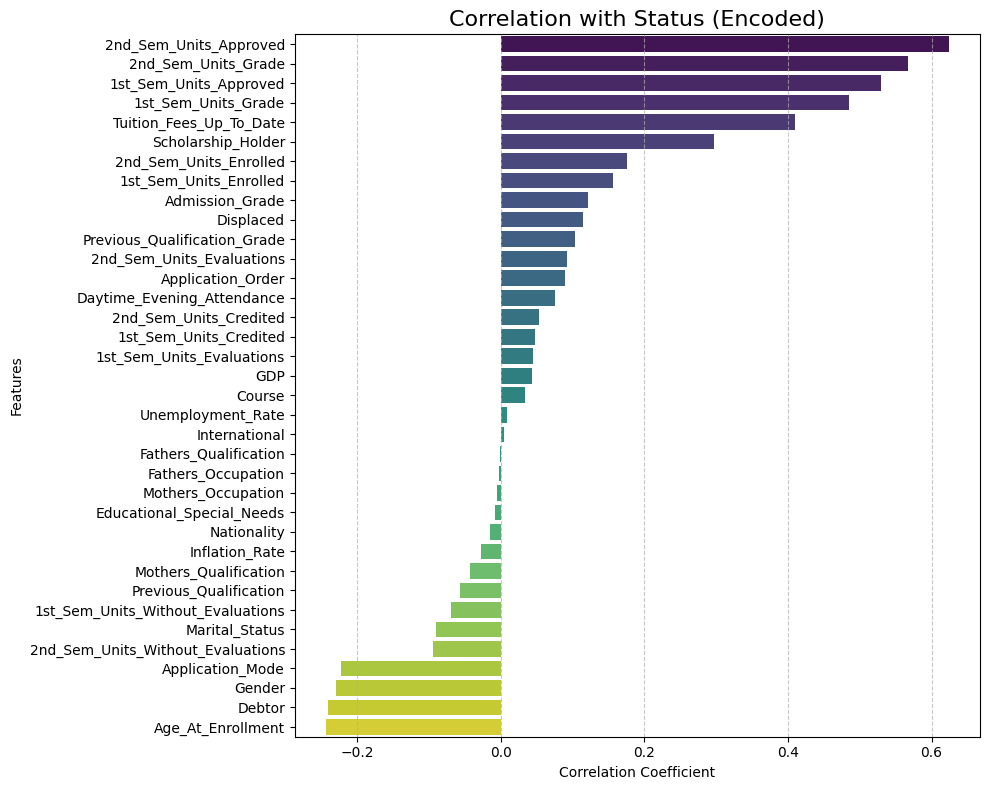

In [15]:
print("\nCorrelation between 'Status' (Encoded) and other features")
if 'Status' in correlation_matrix.columns:
    status_correlations = correlation_matrix['Status'].sort_values(ascending=False)
    print(status_correlations)
else:
    print("'Status' column not found in the correlation matrix. Check encoding steps.")

print("\nVisualization of 'Status' (Encoded) Correlations")
plt.figure(figsize=(10, 8))

status_corr_plot_data = status_correlations.drop('Status')
sns.barplot(x=status_corr_plot_data.values, y=status_corr_plot_data.index, palette='viridis')
plt.title('Correlation with Status (Encoded)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Boxplot untuk melihat pola-pola yang menarik dari data.


Generating box plots for 36 numerical features grouped by Status.


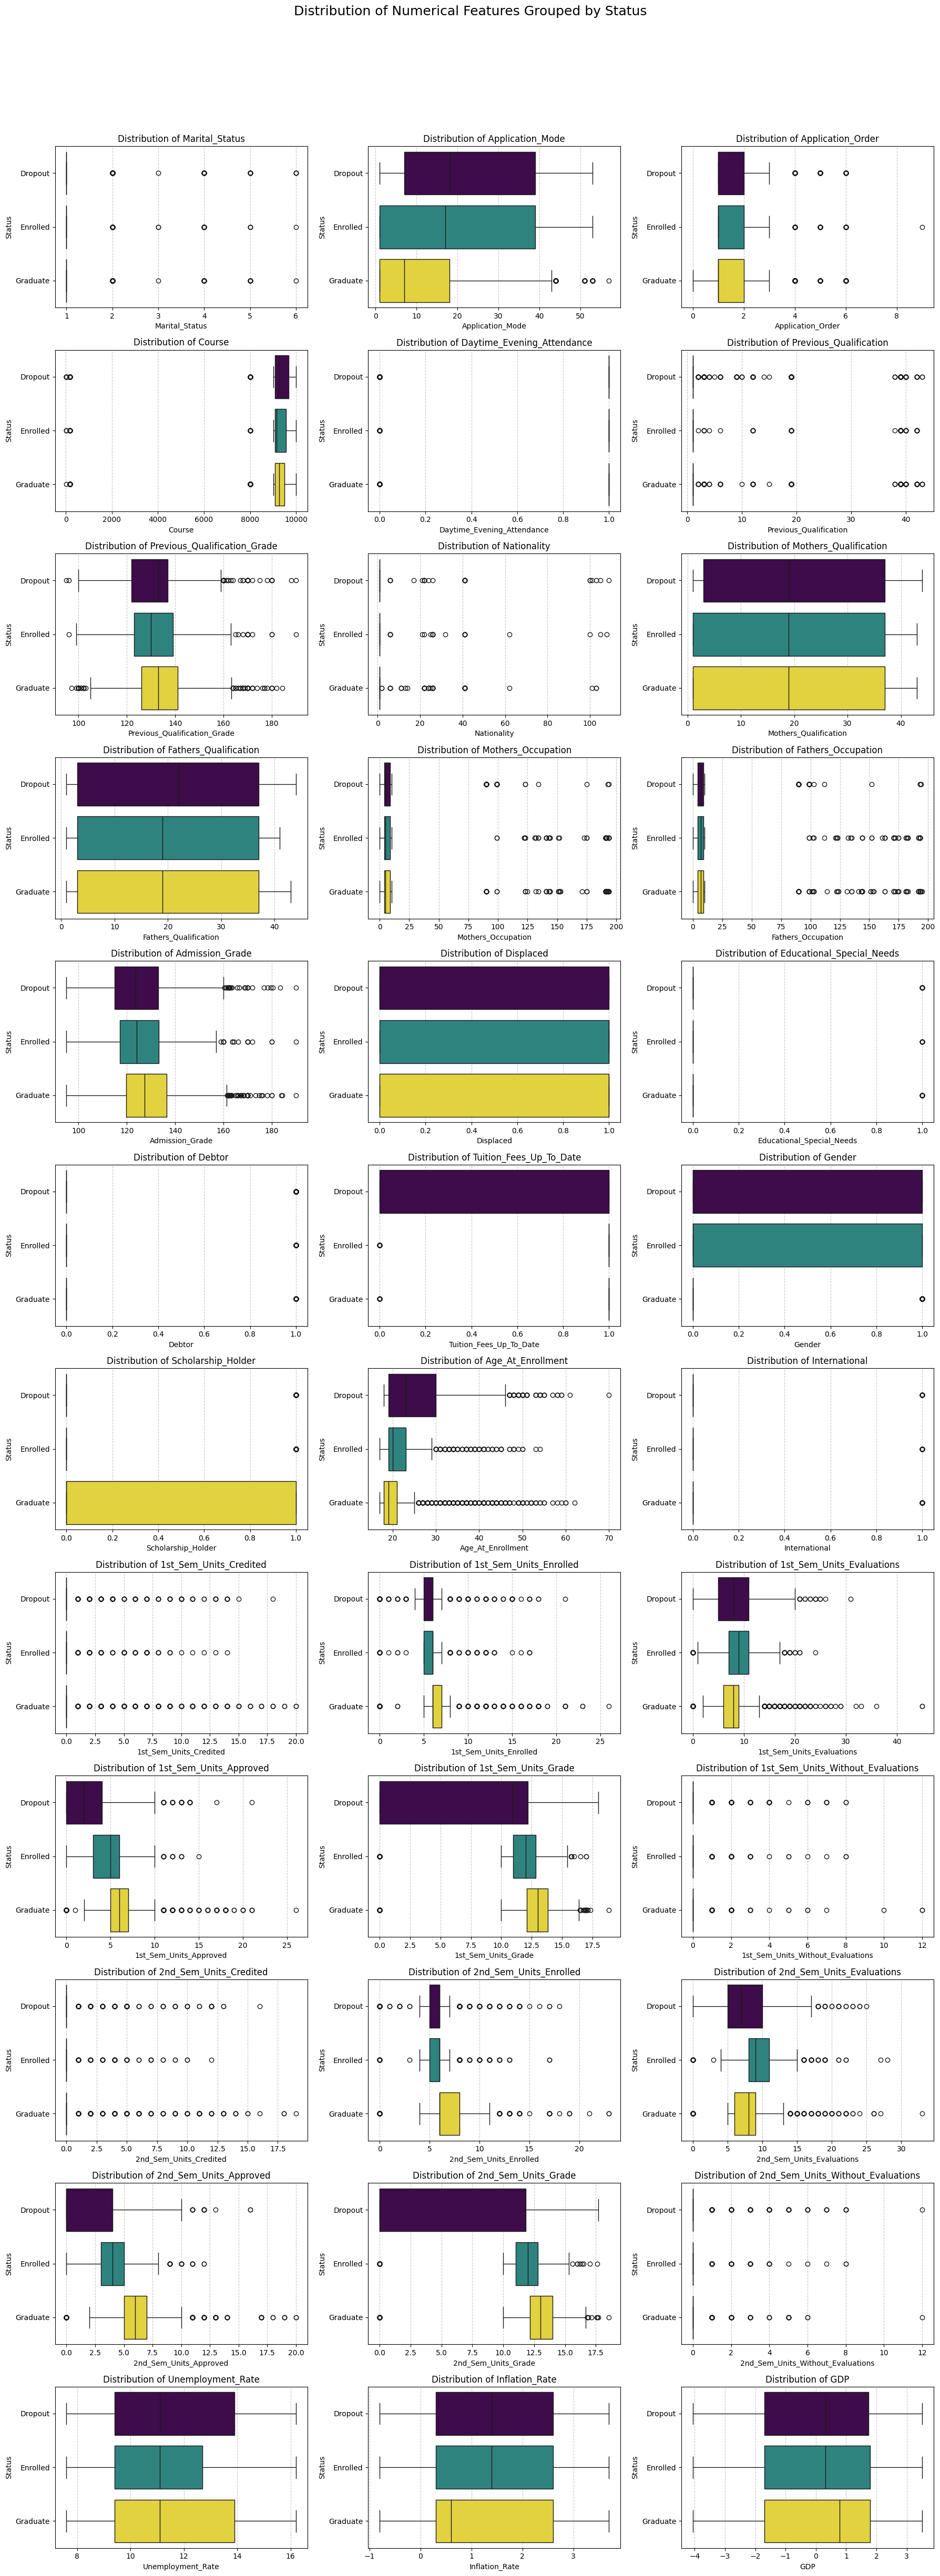

In [16]:
print(f"\nGenerating box plots for {len(numerical_cols)} numerical features grouped by Status.")

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
plt.suptitle('Distribution of Numerical Features Grouped by Status', y=1.02, fontsize=18)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df_encoded, x=col, y='Status', hue='Status', palette='viridis', orient='h', legend=False)

    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Status')

    current_yticks = plt.gca().get_yticks()
    valid_yticks = [tick for tick in current_yticks if tick in inverse_status_mapping]
    plt.gca().set_yticks(valid_yticks)
    plt.gca().set_yticklabels([inverse_status_mapping[tick] for tick in valid_yticks])

    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Data Preparation / Preprocessing

Cek missing values.

In [17]:
df_encoded.isnull().sum()

,0
Marital_Status,0
Application_Mode,0
Application_Order,0
Course,0
Daytime_Evening_Attendance,0
Previous_Qualification,0
Previous_Qualification_Grade,0
Nationality,0
Mothers_Qualification,0
Fathers_Qualification,0


Cek duplicated values.

In [18]:
duplicate_rows_count = df_encoded.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows_count}")

Number of duplicate rows found: 0


Persiapan untuk membuat fitur baru menggunakan kmeans.

In [19]:
kmeans_features = df_encoded.drop('Status', axis=1)
kmeans_features = kmeans_features.select_dtypes(include=np.number)

Scaling data untuk kmeans.

In [20]:
scaler = MinMaxScaler()
scaled_kmeans_features = scaler.fit_transform(kmeans_features)
scaled_kmeans_features_df = pd.DataFrame(scaled_kmeans_features, columns=kmeans_features.columns)

Mencari nilai K yang paling optimal.

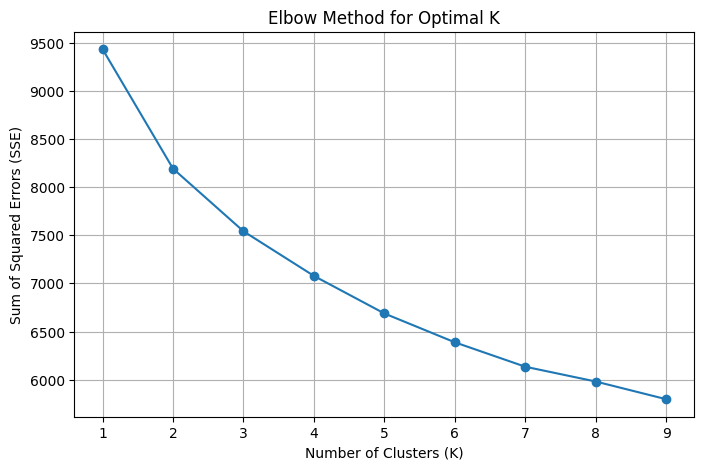

In [21]:
sse = []
k_range = range(1, min(len(scaled_kmeans_features_df), 10))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_kmeans_features_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

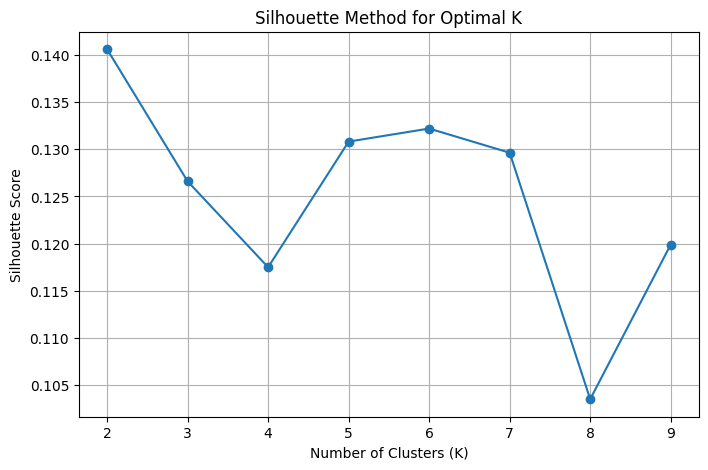

In [22]:
silhouette_scores = []
k_range_silhouette = range(2, min(len(scaled_kmeans_features_df), 10))

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_kmeans_features_df)
    score = silhouette_score(scaled_kmeans_features_df, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

Masukan kode fitur baru ke dataframe.

In [23]:
optimal_k = 3
if len(scaled_kmeans_features_df) < optimal_k:
    print(f"\nWarning: Optimal K ({optimal_k}) is greater than the number of samples ({len(scaled_kmeans_features_df)}). Adjusting K to number of samples.")
    optimal_k = len(scaled_kmeans_features_df)

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['KMeans_Cluster'] = kmeans_model.fit_predict(scaled_kmeans_features_df)

In [24]:
df_encoded[['Status', 'KMeans_Cluster']].head()

,Status,KMeans_Cluster
0,0,2
1,2,2
2,0,2
3,2,1
4,2,0


Cek data bedasarkan fitur baru dari kmeans.

In [25]:
df_encoded['Status_Label'] = df_encoded['Status'].map(inverse_status_mapping)

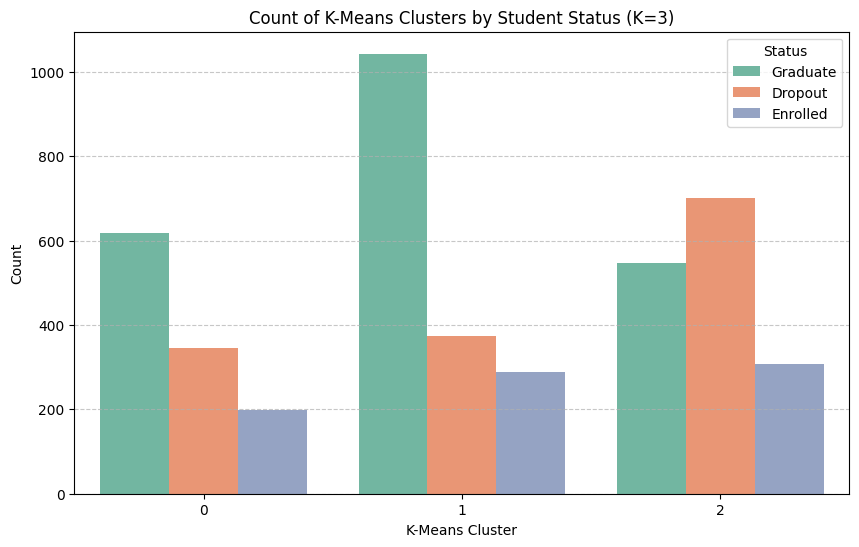

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_encoded, x='KMeans_Cluster', hue='Status_Label', palette='Set2')
plt.title(f'Count of K-Means Clusters by Student Status (K={optimal_k})')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cek korelasi fitur hasil kmeans dengan fitur target.

In [27]:
correlation_matrix = df_encoded.select_dtypes(include=np.number).corr()
print(f"Correlation between 'Status' (Encoded) and 'KMeans_Cluster': {correlation_matrix.loc['Status', 'KMeans_Cluster']:.4f}")

Correlation between 'Status' (Encoded) and 'KMeans_Cluster': -0.1617


Boxplot untuk mencai pola-pola yang menarik.


Generating box plots for 36 numerical features grouped by K-Means Cluster.


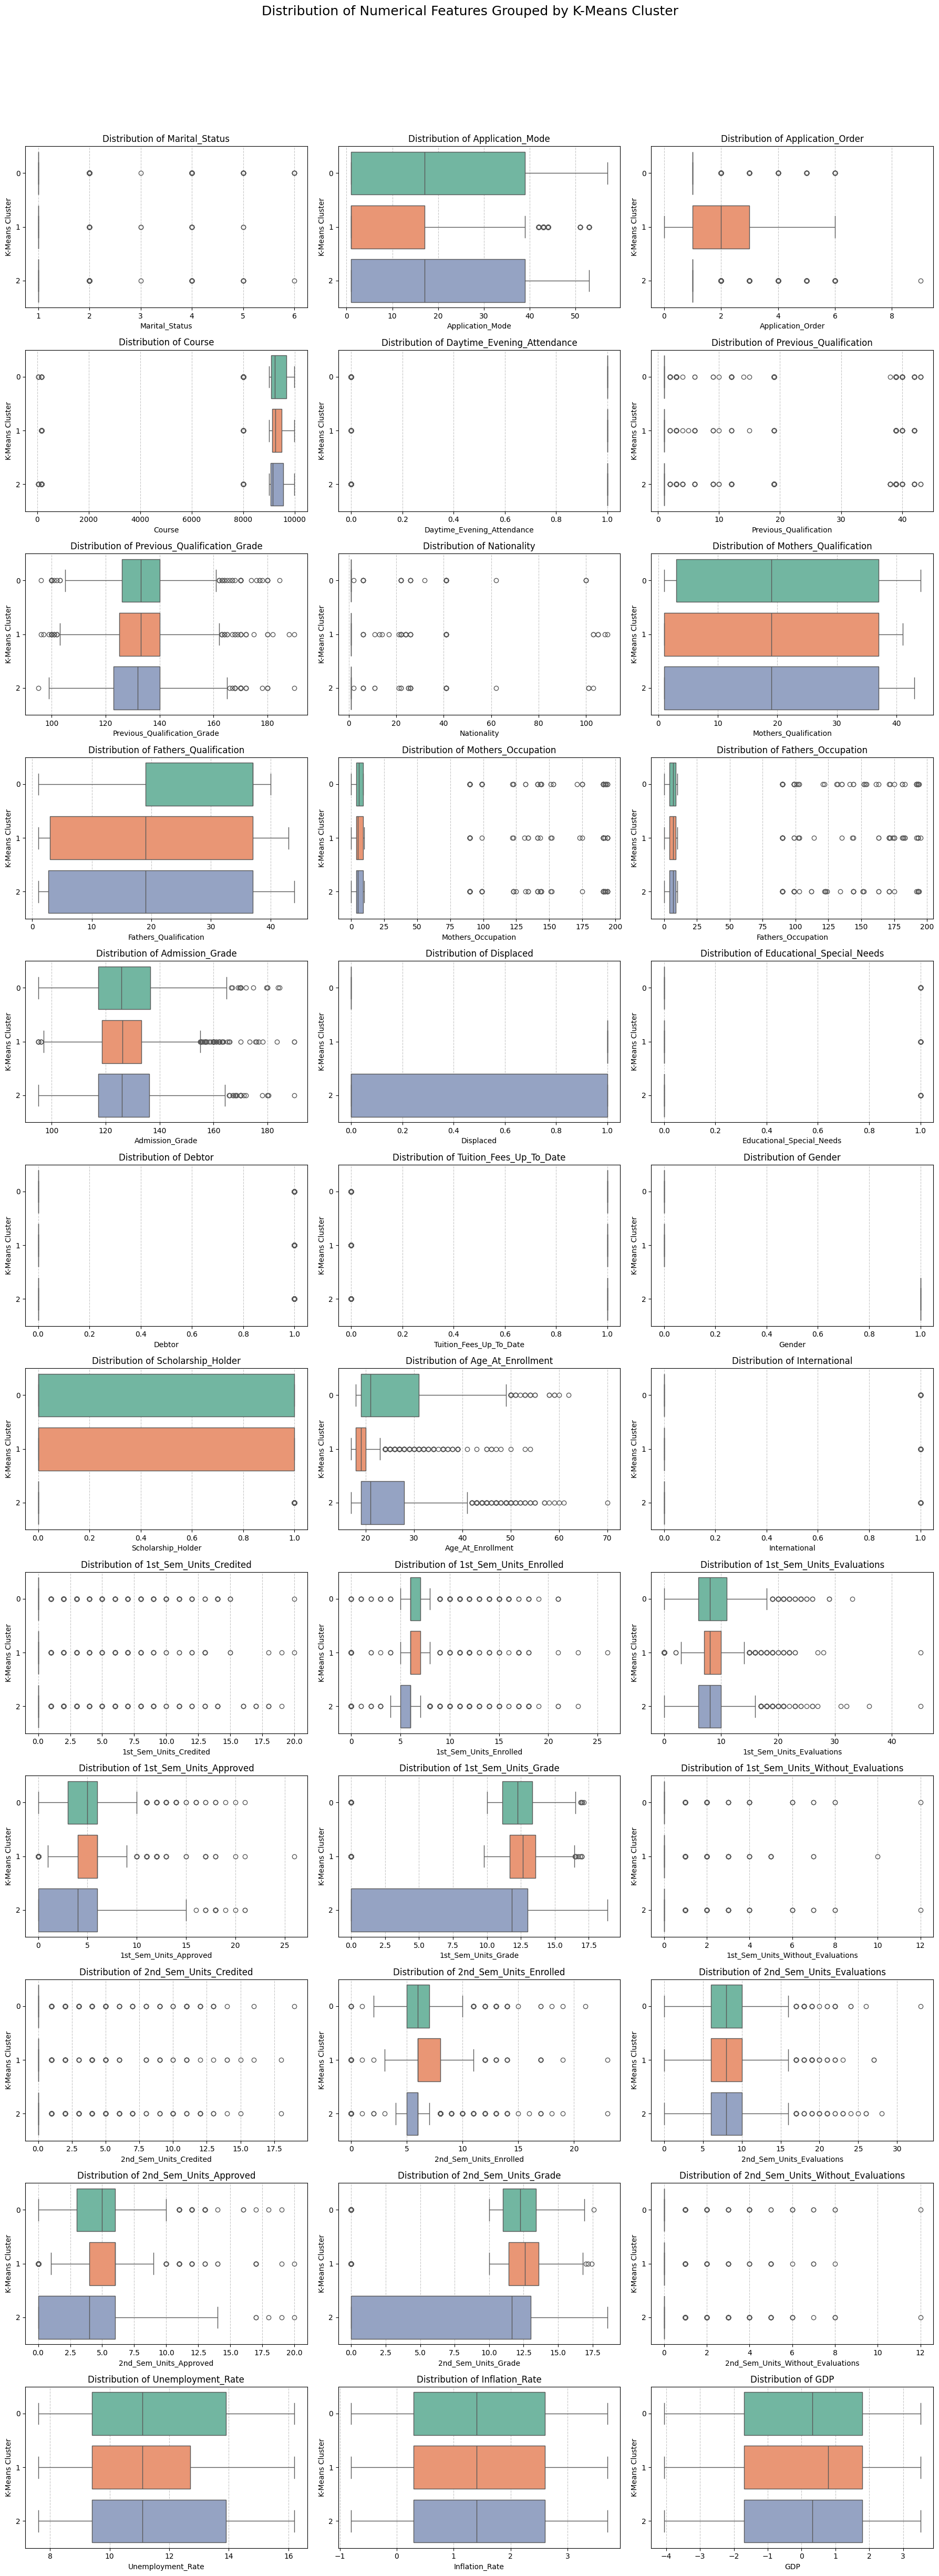

In [28]:
numerical_cols_for_plot = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'Status' in numerical_cols_for_plot:
    numerical_cols_for_plot.remove('Status')
if 'KMeans_Cluster' in numerical_cols_for_plot:
    numerical_cols_for_plot.remove('KMeans_Cluster')

print(f"\nGenerating box plots for {len(numerical_cols_for_plot)} numerical features grouped by K-Means Cluster.")

n_cols = 3
n_rows = (len(numerical_cols_for_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
plt.suptitle('Distribution of Numerical Features Grouped by K-Means Cluster', y=1.02, fontsize=18)

for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    # Use 'KMeans_Cluster' for the y-axis
    sns.boxplot(data=df_encoded, x=col, y='KMeans_Cluster', hue='KMeans_Cluster', palette='Set2', orient='h', legend=False)

    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('K-Means Cluster') # Updated label

    # No need for inverse mapping here as cluster labels are numerical and directly interpretable

    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Mencari cara alternatif untuk mendapatkan fitur baru yang lebih baik dari kmeans dengan cara feature engineering. 

In [29]:
df_engineered = df_encoded.copy()

# Academic Performance Ratios & Aggregations
df_engineered['1st_Sem_Units_Enrolled_Safe'] = np.where(df_engineered['1st_Sem_Units_Enrolled'] == 0, 1, df_engineered['1st_Sem_Units_Enrolled'])
df_engineered['2nd_Sem_Units_Enrolled_Safe'] = np.where(df_engineered['2nd_Sem_Units_Enrolled'] == 0, 1, df_engineered['2nd_Sem_Units_Enrolled'])

df_engineered['Approval_Rate_1st_Sem'] = df_engineered['1st_Sem_Units_Approved'] / df_engineered['1st_Sem_Units_Enrolled_Safe']
df_engineered['Approval_Rate_2nd_Sem'] = df_engineered['2nd_Sem_Units_Approved'] / df_engineered['2nd_Sem_Units_Enrolled_Safe']

df_engineered['No_Eval_Ratio_1st_Sem'] = df_engineered['1st_Sem_Units_Without_Evaluations'] / df_engineered['1st_Sem_Units_Enrolled_Safe']
df_engineered['No_Eval_Ratio_2nd_Sem'] = df_engineered['2nd_Sem_Units_Without_Evaluations'] / df_engineered['2nd_Sem_Units_Enrolled_Safe']

df_engineered['Total_Units_Enrolled'] = df_engineered['1st_Sem_Units_Enrolled'] + df_engineered['2nd_Sem_Units_Enrolled']
df_engineered['Total_Units_Approved'] = df_engineered['1st_Sem_Units_Approved'] + df_engineered['2nd_Sem_Units_Approved']

df_engineered['Total_Units_Enrolled_Safe'] = np.where(df_engineered['Total_Units_Enrolled'] == 0, 1, df_engineered['Total_Units_Enrolled'])
df_engineered['Overall_Approval_Rate'] = df_engineered['Total_Units_Approved'] / df_engineered['Total_Units_Enrolled_Safe']

# Simple average of grades
df_engineered['Average_Curricular_Grade'] = (df_engineered['1st_Sem_Units_Grade'] + df_engineered['2nd_Sem_Units_Grade']) / 2

# Clean up temporary 'Safe' columns
df_engineered = df_engineered.drop(columns=['1st_Sem_Units_Enrolled_Safe', '2nd_Sem_Units_Enrolled_Safe', 'Total_Units_Enrolled_Safe'])

In [30]:
# Parental/Family Background Indicators
df_engineered['Avg_Parental_Qualification'] = (df_engineered['Mothers_Qualification'] + df_engineered['Fathers_Qualification']) / 2
df_engineered['Avg_Parental_Occupation'] = (df_engineered['Mothers_Occupation'] + df_engineered['Fathers_Occupation']) / 2

In [31]:
# Financial Standing
df_engineered['Financial_Health_Score'] = df_engineered['Tuition_Fees_Up_To_Date'] - df_engineered['Debtor'] + df_engineered['Scholarship_Holder']


In [32]:
df_engineered.head().T

,0,1,2,3,4
Marital_Status,1,1,1,1,2
Application_Mode,17,15,1,17,39
Application_Order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime_Evening_Attendance,1,1,1,1,0
Previous_Qualification,1,1,1,1,1
Previous_Qualification_Grade,122.0,160.0,122.0,122.0,100.0
Nationality,1,1,1,1,1
Mothers_Qualification,19,1,37,38,37
Fathers_Qualification,12,3,37,37,38


Cek korelasi.


--- Correlation between 'Status' (Encoded) and other features (with Engineered Features) ---
Status                               1.000000
Approval_Rate_2nd_Sem                0.699155
Overall_Approval_Rate                0.686278
Approval_Rate_1st_Sem                0.626945
2nd_Sem_Units_Approved               0.624157
Total_Units_Approved                 0.590362
2nd_Sem_Units_Grade                  0.566827
Average_Curricular_Grade             0.550356
1st_Sem_Units_Approved               0.529123
1st_Sem_Units_Grade                  0.485207
Financial_Health_Score               0.462623
Tuition_Fees_Up_To_Date              0.409827
Scholarship_Holder                   0.297595
2nd_Sem_Units_Enrolled               0.175847
Total_Units_Enrolled                 0.167721
1st_Sem_Units_Enrolled               0.155974
Admission_Grade                      0.120889
Displaced                            0.113986
Previous_Qualification_Grade         0.103764
2nd_Sem_Units_Evaluations       

<ipython-input-33-69d628451830>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_corr_plot_data_engineered.values, y=status_corr_plot_data_engineered.index, palette='Set2')


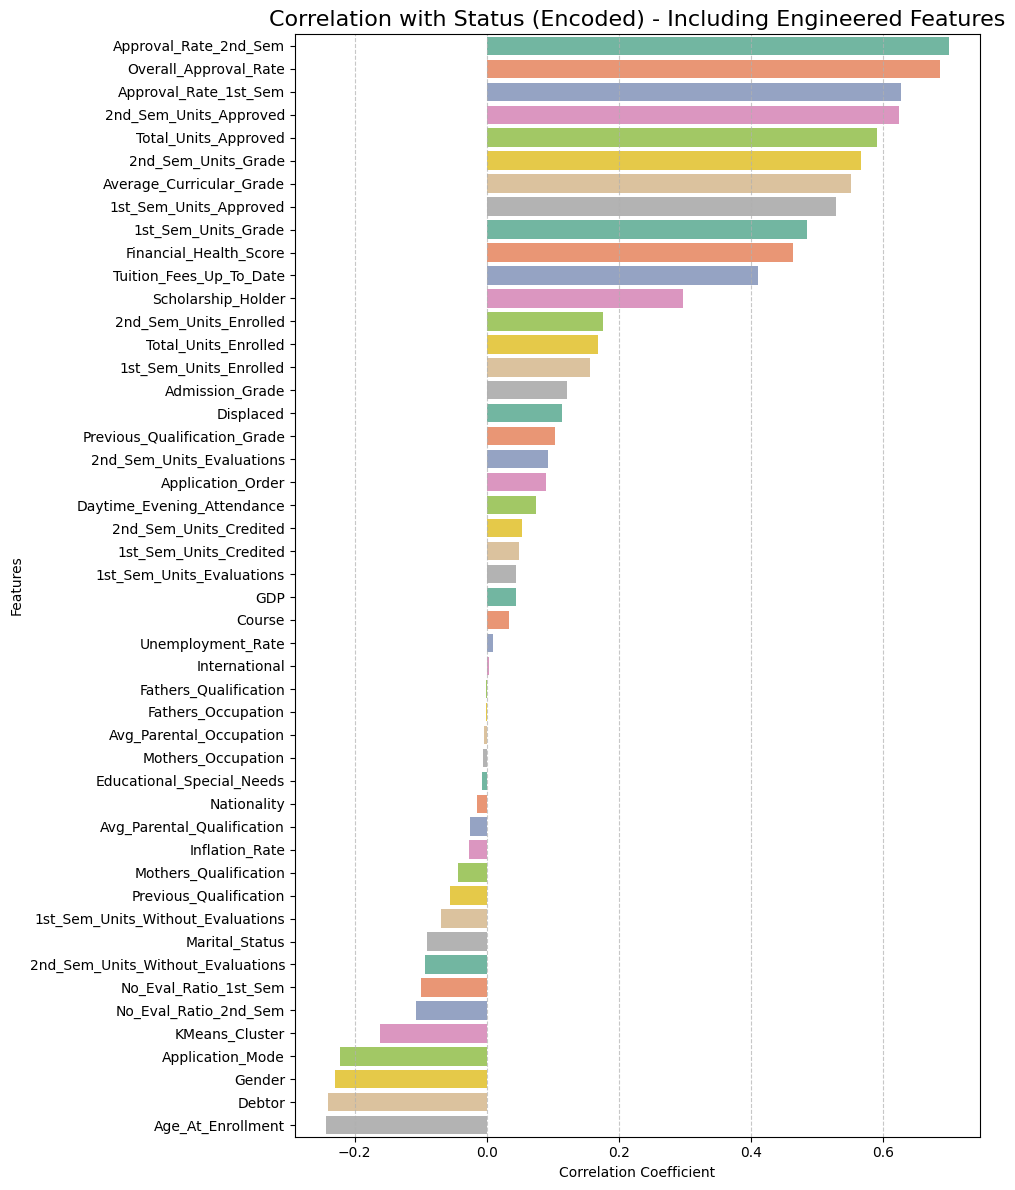

In [33]:
correlation_matrix_engineered = df_engineered.select_dtypes(include=np.number).corr()
print("\n--- Correlation between 'Status' (Encoded) and other features (with Engineered Features) ---")
if 'Status' in correlation_matrix_engineered.columns:
    status_correlations_engineered = correlation_matrix_engineered['Status'].sort_values(ascending=False)
    print(status_correlations_engineered)
else:
    print("'Status' column not found in the correlation matrix.")

print("\n--- Visualization of 'Status' (Encoded) Correlations (with Engineered Features) ---")
plt.figure(figsize=(10, 12))
status_corr_plot_data_engineered = status_correlations_engineered.drop('Status')
sns.barplot(x=status_corr_plot_data_engineered.values, y=status_corr_plot_data_engineered.index, palette='Set2')
plt.title('Correlation with Status (Encoded) - Including Engineered Features', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
df_engineered.shape

(4424, 50)

Hapus fitur yang tidak relevan, dan pilih yang relevan bedasarkan nilai korelasi.

In [35]:
# Feature Selection based on Correlation
correlation_matrix = df_engineered.select_dtypes(include=np.number).corr()
status_correlations = correlation_matrix['Status'].abs().sort_values(ascending=False)
features_to_keep = status_correlations[status_correlations >= 0.4].index.tolist()
if 'Status' not in features_to_keep:
    features_to_keep.append('Status')

Cek fitur apa saja dan berapa jumlahnya yang masih tersisa.

In [36]:
df_filtered = df_engineered[features_to_keep].copy()

print("\nFeatures selected based on |Correlation with Status| >= 0.4")
print(df_filtered.columns.tolist())
print(f"Number of features after filtering: {len(df_filtered.columns) - 1}")


Features selected based on |Correlation with Status| >= 0.4
['Status', 'Approval_Rate_2nd_Sem', 'Overall_Approval_Rate', 'Approval_Rate_1st_Sem', '2nd_Sem_Units_Approved', 'Total_Units_Approved', '2nd_Sem_Units_Grade', 'Average_Curricular_Grade', '1st_Sem_Units_Approved', '1st_Sem_Units_Grade', 'Financial_Health_Score', 'Tuition_Fees_Up_To_Date']
Number of features after filtering: 11


Definisikan X dan y, fitur target & yg bukan.

In [37]:
X = df_filtered.drop('Status', axis=1)
y = df_filtered['Status']
X = X.select_dtypes(include=np.number)
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (4424, 11)
Shape of y (target): (4424,)


In [38]:
print("\nFeatures used for training:")
print(X.columns.tolist())


Features used for training:
['Approval_Rate_2nd_Sem', 'Overall_Approval_Rate', 'Approval_Rate_1st_Sem', '2nd_Sem_Units_Approved', 'Total_Units_Approved', '2nd_Sem_Units_Grade', 'Average_Curricular_Grade', '1st_Sem_Units_Approved', '1st_Sem_Units_Grade', 'Financial_Health_Score', 'Tuition_Fees_Up_To_Date']


Pembagian Data.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


Training set size: 3539 samples
Test set size: 885 samples


## Modeling

Modeling & Training.

In [41]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [42]:
%%time
print("\nTraining XGBoost Classifier")
xgb_model.fit(X_train, y_train)
print("XGBoost training complete.")


Training XGBoost Classifier


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost training complete.
CPU times: user 647 ms, sys: 17.8 ms, total: 665 ms
Wall time: 368 ms


Cek feature importance.

In [43]:
print("\nFeature Importances")
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances


Feature Importances


,0
Overall_Approval_Rate,0.366284
Tuition_Fees_Up_To_Date,0.226551
Approval_Rate_2nd_Sem,0.098749
Financial_Health_Score,0.068552
Total_Units_Approved,0.037715
Approval_Rate_1st_Sem,0.037506
Average_Curricular_Grade,0.035349
1st_Sem_Units_Grade,0.033909
1st_Sem_Units_Approved,0.032266
2nd_Sem_Units_Approved,0.031889


## Evaluation

Evaluasi dengan akurasi, presisi, recall, & f1 score.

In [44]:
print("\nModel Evaluation")
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)     # 'weighted' for multi-class
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)         # 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")


Model Evaluation
Accuracy: 0.7401
Precision (weighted): 0.7247
Recall (weighted): 0.7401
F1-Score (weighted): 0.7306


Membuat confusion matrix.

Accuracy: 0.7401
Precision (weighted): 0.7247
Recall (weighted): 0.7401
F1-Score (weighted): 0.7306

Classification Report
              precision    recall  f1-score   support

     Dropout       0.76      0.76      0.76       284
    Enrolled       0.43      0.33      0.38       159
    Graduate       0.81      0.88      0.84       442

    accuracy                           0.74       885
   macro avg       0.67      0.66      0.66       885
weighted avg       0.72      0.74      0.73       885


Confusion Matrix
[[215  36  33]
 [ 48  53  58]
 [ 21  34 387]]


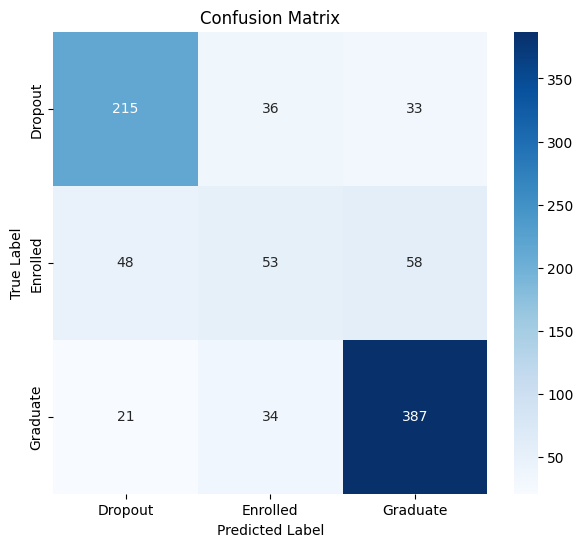

In [45]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

print("\nClassification Report")
class_names = [inverse_status_mapping[i] for i in sorted(y.unique())]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Saving

Menyimpan model.

In [46]:
model_filename = 'model.joblib'
joblib.dump(xgb_model, model_filename)
print(f"\nModel saved to {model_filename}")


Model saved to model.joblib
